10 % done
20 % done
30 % done
40 % done
50 % done
60 % done
70 % done
80 % done
90 % done
(44571, 160, 320, 3)


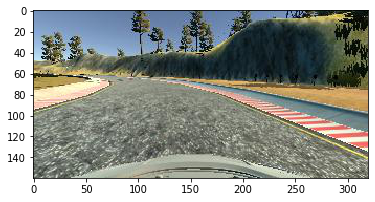

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# File name
driving_log = "./driving_log.csv"

# Read data info
rows = []
with open(driving_log) as file:
    reader = csv.reader(file)
    for row in reader:
        rows.append(row)
        
images = []
mesurements = []
debug_percent = len(rows)/100
debug_step = 10
debug_count = 0

for row in rows:
    # Use '/' if data collection ran on linux 
    center_image_file = row[0].split('\\')[-1]
    img = Image.open("./IMG/"+center_image_file)
    images.append(np.array(img))
    img.close()
    mesurements.append(float(row[3]))
    
    if (debug_count > debug_percent*debug_step):
        print (debug_step, "% done")
        debug_step+=10
    debug_count+=1

# Convert into np array
x_train = np.array(images)
y_train = np.array(mesurements)   
print (np.shape(x_train))

# Plot example image
plt.figure()
plt.imshow(images[0])

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss="mse", optimizer="adam")
model.fit(x_train, y_train, validation_split = 0.2, shuffle=True, nb_epoch=10)

model.save("model.h5")

C:\Users\nguyenbui\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 35656 samples, validate on 8915 samples
Epoch 1/10
35656/35656 [==============================] - 28s 783us/step - loss: 1576966.1840 - val_loss: 1931.5157
Epoch 2/10
35656/35656 [==============================] - 28s 775us/step - loss: 111868.3780 - val_loss: 8601.1760
Epoch 3/10
35656/35656 [==============================] - 29s 802us/step - loss: 406912.2269 - val_loss: 66296.4781
Epoch 4/10
35656/35656 [==============================] - 28s 780us/step - loss: 358269.4480 - val_loss: 562428.1377
Epoch 5/10
35656/35656 [==============================] - 28s 772us/step - loss: 375458.7919 - val_loss: 45373.6927
Epoch 6/10
35656/35656 [==============================] - 28s 782us/step - loss: 407780.6116 - val_loss: 22467.6771
Epoch 7/10
35656/35656 [==============================] - 28s 771us/step - loss: 342576.1808 - val_loss: 48305.1075
Epoch 8/10
35656/35656 [==============================] - 28s 778us/step - loss: 381531.9250 - val_loss: 15364.3648
Epoch 9/10
35656/35656 